<a href="https://colab.research.google.com/github/itsTurner/ben-learns-ml/blob/main/MyFirstMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from random import random
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as skPCA





1.   Create MLP Class
2.   Create Random Weights
3.   Create Biases
4.   Create Ability to Feed Forward
5.   Create Ability to Calculate Error
6.   Apply Error Correction Through Feed Forward
7.   Create Learning
8.   Make subtraction dataset
9.   Test MLP Output



In [ ]:
class MLPMine:
  def __init__ (self, inputCount = 4, hiddenLayers = [3], outputCount = 1):
    
    self.inputCount = inputCount
    self.hiddenLayers = hiddenLayers
    self.outputCount = outputCount

    layers = [self.inputCount] + self.hiddenLayers + [self.outputCount]
    self.weights = []

    for i in range(len(layers) - 1):
      self.weights.append(np.random.rand(layers[i], layers[i + 1]))

    activations = []

    for i in range(len(layers)):
      a = np.zeros(layers[i])
      activations.append(a) 

    self.activations = activations

    derivatives = []

    for i in range(len(layers) - 1):
      d = np.zeros((layers[i], layers[i+1]))
      derivatives.append(d) 

    self.derivatives = derivatives




  def forwardPropagate(self, input):

    #iterate through each set of weights and get an h value
    #Use this h value to get an activation and feed this to the next layer
    activations = input
    self.activations[0] = activations
    for i, w in enumerate(self.weights):
      net_inputs = np.dot(activations, w)
      activations = self._sigmoid(net_inputs)
      self.activations[i+1] = activations
    return activations

  def backPropagate(self, error, verbose=False):

    for i in reversed(range(len(self.derivatives))):

      
      activations = self.activations[i+1]

      delta = error * self._sigmoid_derivative(activations)

      delta_reshaped = delta.reshape(delta.shape[0], -1).T

      current_activations = self.activations[i]

      current_activations = current_activations.reshape(current_activations.shape[0],-1)

      self.derivatives[i] = np.dot(current_activations, delta_reshaped)

      error = np.dot(delta, self.weights[i].T)
      if verbose:
        print(self.derivatives[i])
    return error

  def gradient_descent(self, learning_rate):
    for i in range(len(self.weights)):
      weights = self.weights[i]

      #print("original weights {}, {}".format(i, self.weights[i]))

      derivatives = self.derivatives[i]
      weights += derivatives * learning_rate

      #print("new weights {}, {}".format(i, self.weights[i]))

  def train(self, inputs, targets, epochs = 100, learning_rate = 0.1):
    for i in range(epochs):
      sum_error = 0
      for j, input in enumerate(inputs):
        output = self.forwardPropagate(input)
        target = targets[j]
        error = target - output

        self.backPropagate(error)

        self.gradient_descent(learning_rate)
      
        sum_error+= self._mse(target, output)
      
      #print("Error: {} at epoch {}".format(sum_error/ len(inputs), i))

  def _mse(self, target, output):
    return np.average((target - output)**2)

  def _sigmoid(self, x):
    y = 1.0 / (1 + np.exp(-x))
    return y

  def _sigmoid_derivative(self, x):
    return x * (1.0 - x)

  

if __name__ == "__main__":
  mlpMine = MLPMine(2, [5], 1)
  #print(Learner.forwardPropagate([0.5, 0.2]))
  input = np.array([0.1, 0.1])
  target = np.array([0.3])
  
  items = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
  targets = np.array([[i[1] + i[0]] for i in items])

  mlpMine.train(items, targets)

  output = mlpMine.forwardPropagate(input)

  print("output of", output)

  #print("sigmoid output", Learner._sigmoidFunction([0.5]))

output of [0.18829308]


In [ ]:
if __name__ == "__main__":
  # print("items", items)
  # print("targets", targets)
  print("average", np.average(targets))
  input = np.array([0.1, 0.01])
  output = mlpMine.forwardPropagate(input)
  print("output of", output)

average 0.5047271753359525
output of [0.12354505]


##Next we're going to apply this simple MLP to a diabetes classifier

First we need to import the data we want

In [ ]:
fullDiabetesData = pd.read_csv('diabetes.csv')
diabetseData = fullDiabetesData[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]
shuffledDiabetseData = diabetseData.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(shuffledDiabetseData[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], shuffledDiabetseData[['Outcome']], test_size=0.1, random_state=42)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

print("y_train shape" , y_train.shape)

emptyArray = np.zeros((y_train.shape))

for index, i in enumerate(y_train):
  try:
    emptyArray[index] = 1.0-i
  except:
    print(index)
# print("X_train", X_train)
# print("X_test", X_test)
# print("y_train", y_train)
# print("y_test", y_test)
#y_train, emptyArray = y_train.T, emptyArray.T
#print(y_train[1])
#print(a.shape)
#print("initial", y_train)

print(y_train[0])
y_train = np.append(y_train, emptyArray, axis=1)
#print(y_train.shape)
#print(y_train[0])



currentMax = np.amax(X_train, axis=0)
print("initial", X_train[0])
print("maximum value", currentMax)
for i in range(len(X_train)):
  X_train[i] = X_train[i] / currentMax
print("after", X_train[0])

for i in range(len(X_test)):
  X_test[i] = X_test[i] / currentMax

#for index, i in enumerate(X_train):


#print(emptyArray[0])
print("final", y_train)
print(y_train.shape)
print(X_train.shape)
#print("mt", emptyArray)


y_train shape (691, 1)
[1]
initial [85.     0.    29.     1.224]
maximum value [199.   846.    67.1    2.42]
after [0.42713568 0.         0.43219076 0.50578512]
final [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(691, 2)
(691, 4)


Next we need to initialize a new MLP that fits this new data

In [ ]:
if __name__ == "__main__":
  diabetesMLP = MLPMine(4, [3], 2)
  #print(Learner.forwardPropagate([0.5, 0.2]))
  input = np.array([0.2, 0.2, 0.2, 0.2])
  target = np.array([[0.3], [0.4]])
  
  print(diabetesMLP.forwardPropagate(input))
  diabetesMLP.train(X_train, y_train)
  

  #print("output of", output, "should be", y_test[0])

[0.67094594 0.76743504]


##Function to test different network shapes

Base code

In [ ]:
correct = 0
predicted = []
for index, i in enumerate(X_test):
    output = diabetesMLP.forwardPropagate(i)
    output = np.argmax(output)
    output = 1 - output
    #predicted.append([output, y_test[index]])
    predicted.append([output, y_test[index]])
  
    if output == y_test[index]:
      #print("we were right")
      correct+=1
    else:
      print("this one was wrong", X_test[index], "guesses", predicted[index])

print("percentage correct", correct/len(y_test))
print("not diabetes count", np.count_nonzero(y_test == 0), "which is {}% of total".format(np.count_nonzero(y_test == 0)/len(y_test)))
print("diabetes count", np.count_nonzero(y_test == 1), "which is {}% of total".format(np.count_nonzero(y_test == 1)/len(y_test)))
#print(predicted)
#print("diabetes count", y_test.count(1))

this one was wrong [0.64321608 0.         0.59612519 0.45495868] guesses [1, array([0])]
this one was wrong [0.59798995 0.         0.43219076 0.10867769] guesses [0, array([1])]
this one was wrong [0.79899497 0.         0.40834575 0.1214876 ] guesses [1, array([0])]
this one was wrong [0.50251256 0.         0.44709389 0.2       ] guesses [0, array([1])]
this one was wrong [0.72361809 0.33687943 0.47690015 0.18677686] guesses [0, array([1])]
this one was wrong [0.44221106 0.11702128 0.81967213 0.20495868] guesses [0, array([1])]
this one was wrong [0.82914573 0.30141844 0.71385991 0.10702479] guesses [1, array([0])]
this one was wrong [0.87939698 0.         0.34128167 0.13471074] guesses [1, array([0])]
this one was wrong [0.77386935 0.22813239 0.4366617  0.34669421] guesses [1, array([0])]
this one was wrong [0.51256281 0.         0.58867362 0.12107438] guesses [0, array([1])]
this one was wrong [0.90452261 0.08274232 0.50670641 0.11198347] guesses [1, array([0])]
this one was wrong [0

The actual function

In [ ]:
def efficacy(multiLayer):

  correct = 0
  predicted = np.array([])
  for index, i in enumerate(X_test):
    output = multiLayer.forwardPropagate(i)
    output = np.argmax(output)
    output = 1 - output
    #predicted.append([output, y_test[index]])
    predicted = np.append(predicted, [output])



    if output == y_test[index]:
      #print("we were right")
      correct+=1
    #else:
      #print("this one was wrong", X_test[index], "guesses", predicted[index])

  print("percentage correct", correct/len(y_test))
  print("not diabetes count", np.count_nonzero(y_test == 0), "which is {}% of total. ".format(np.count_nonzero(y_test == 0)/len(y_test)), "We predicted not diabetes {} times". format(np.count_nonzero(predicted == 0)))
  print("diabetes count", np.count_nonzero(y_test == 1), "which is {}% of total. ".format(np.count_nonzero(y_test == 1)/len(y_test)), "We predicted diabetes {} times". format(np.count_nonzero(predicted == 1)))
  pca = skPCA(n_components=1)
  transformed = pd.DataFrame(pca.fit_transform(X_test))
  #print(transformed)
  #dataframe=pd.DataFrame(predicted, columns=['2']) 
  transformed['Predictions'] = predicted
  transformed.plot()
  # print(predicted)
  # print(y_test)

Actually testing efficacies

percentage correct 0.7272727272727273
not diabetes count 56 which is 0.7272727272727273% of total.  We predicted not diabetes 45 times
diabetes count 21 which is 0.2727272727272727% of total.  We predicted diabetes 32 times
percentage correct 0.7402597402597403
not diabetes count 56 which is 0.7272727272727273% of total.  We predicted not diabetes 46 times
diabetes count 21 which is 0.2727272727272727% of total.  We predicted diabetes 31 times


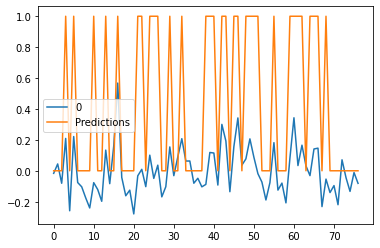

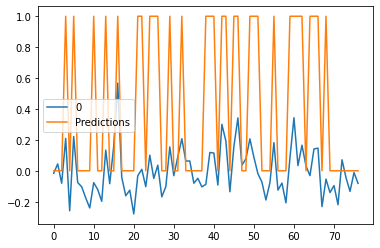

In [ ]:
sampleMLP1 = MLPMine(4, [5, 5], 2)
sampleMLP1.train(X_train, y_train)
efficacy(sampleMLP1)

sampleMLP2 = MLPMine(4, [4, 4], 2)
sampleMLP2.train(X_train, y_train)
efficacy(sampleMLP2)



